In [1]:
import matplotlib.pyplot as plt
import numpy as np  
import sys


#Files data 
VAL = "data/val.rna.txt"
TRAIN = "data/train.rna.txt"
TEST = "data/test.rna.txt"

number_to_loc = {0: "Nucleus",1: "Cytoplasm", 2: "Secreted", 3: "Ribosome", 4: "Endoplasmic\nreticulum", 5: "Mitochondrion"}
loc_to_number = {value : str(key) for key,value in number_to_loc.items()}
def extract_stat(file_name):
    """ Extract information from a data file"""
    sequences = []
    lengths = []
    categories = []

    with open(file_name, 'r') as fIn : 
        for line in fIn :
            splited_line = line.strip().split(',')
            sequences.append(splited_line[0])
            categories.append(number_to_loc[int(splited_line[1])] )
            lengths.append(len(splited_line[0]))
            
    return(sequences, lengths, categories)



def filter_sequences_present_several_times(file_name, output_name = None):
    """
        Remove sequences that were allocated to several location
        Supress copies
    """
    if output_name is None : 
        output_name = file_name.split('.')[0]+ '_filtered.txt'

    with open(output_name, 'w') as fOut : 
        seq,_,cat = extract_stat(file_name)
        # print("total number " + str(len(seq)), "unique" +str(len(set(seq))))
        unique_pos = [i for i in range (len(seq)) if seq.count(seq[i])==1]
        for u in unique_pos : 
            fOut.write(seq[u] + "," + loc_to_number[cat[u]] + "\n")

        notuniques = {i:[j for j in range(len(seq)) if seq[j]==i] for i in seq if seq.count(i)>1}
        for key,values in notuniques.items():
            categories = [cat[j] for j in values]
            if len(set(categories))==1:
                fOut.write(key + "," + loc_to_number[cat[values[0]]] + "\n")
                


    
def compute_size_data_set(file_names):
    nbr_rna_seq = 0
    for f in file_names :
        seq,leng,cat = extract_stat(f)
        nbr_rna_seq += len(seq)
    print(nbr_rna_seq)

# compute_size_data_set([TRAIN, VAL, TEST])
# sys.exit()




# plt.subplot(211)
# sequence_length_plot(TRAIN)
# plt.subplot(212)
# RNA_destination_plot(TRAIN)

# plt.show()
for datas in [VAL,TRAIN,TEST] : 
    filter_sequences_present_several_times(datas)

In [81]:
import seaborn as sns
sns.set(style="darkgrid")

seqs,lengths,cats = extract_stat(TRAIN)

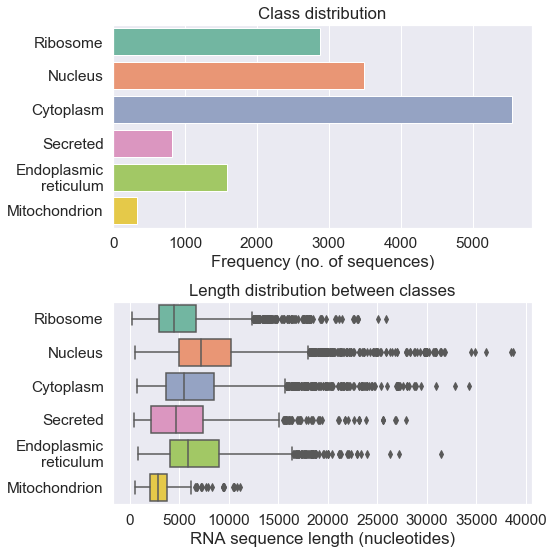

In [79]:
sns.set(font_scale=1.4)

f, ax = plt.subplots(2, 1, figsize=(8, 8))

# length distribution
#sns.distplot(lengths, kde=False, rug=False, label="BTX mean (HABA + BTN)", color="c", kde_kws={"gridsize": 500, "label": "KDE"}, hist_kws={"label": "Histogram"}, ax=ax[0])
#ax[0].set_title("Length distribution")
#ax[0].set_xlabel("RNA sequence length")
#ax[0].set_ylabel("Frequency (no. of sequences)")


# class balance
sns.countplot(y=cats, palette="Set2", ax=ax[0])
#ax[0].axhline(0, color="k", clip_on=False)
ax[0].set_title("Class distribution")
#ax[0].set_xlabel("Subcellular localization")
ax[0].set_xlabel("Frequency (no. of sequences)")

sns.boxplot(x=lengths, y=cats, orient="h", palette="Set2", ax=ax[1])
ax[1].set_title("Length distribution between classes")
ax[1].set_xlabel("RNA sequence length (nucleotides)")
#ax[1].set_ylabel("Subcellular localization")

#sns.despine(bottom=True)
plt.tight_layout(h_pad=0.8)

In [80]:
f.savefig('data_viz.eps', format='eps')